In [12]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [13]:
# 2. Đọc file dữ liệu chứng khoán Vietcombank và chia tập train test theo tỉ lệ 7:3
df = pd.read_csv('Vietcombank.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Chia dữ liệu thành 2 tập train và test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [14]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA phù hợp nhất bằng auto_arima 
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit mô hình
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=14555.529, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=14559.115, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=14560.499, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14560.494, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=14557.905, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=14563.889, Time=0.36 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=14563.759, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=14556.902, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=14556.965, Time=0.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=14562.473, Time=0.13 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=14563.532, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=14563.057, Time=0.22 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=14556.505, Time=1.29 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=14554.375, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(2, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [16]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [17]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Tạo một mảng gồm 30 số nguyên liên tiếp bắt đầu từ last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Dự đoán giá đóng cho 30 ngày tiếp theo
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# In ra giá đóng đã được dự đoán trong 30 ngày tiếp theo
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[68592.29477155 68711.94137238 68774.14967678 68739.04955496
 68637.88500937 68546.24821087 68527.93381963 68590.87543686
 68685.33401197 68742.76269331 68725.27598559 68650.22234311
 68574.26020985 68550.86592923 68592.94482679 68666.49246853
 68717.66941088 68711.99767128 68657.29926802 68595.34330264
 68570.18542587 68597.03457102 68653.50369711 68697.88731349
 68699.79075779 68660.74034426 68610.95740206 68586.17209655
 68602.12717541 68644.85589036]


In [18]:
# 6. Tính độ đo RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 14267.629909345334


In [19]:
# 7. Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 15.171260947172591


In [20]:
# 8. Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing MAE: 12485.6218362346


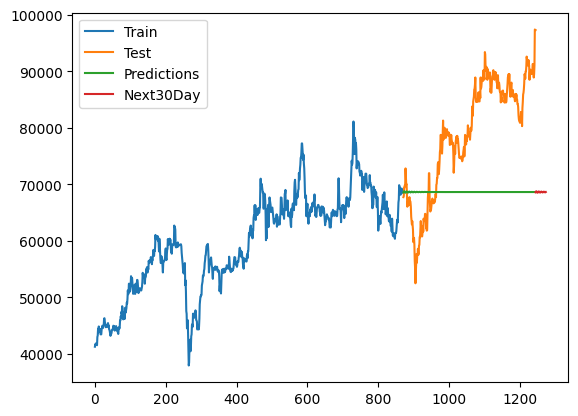

In [21]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

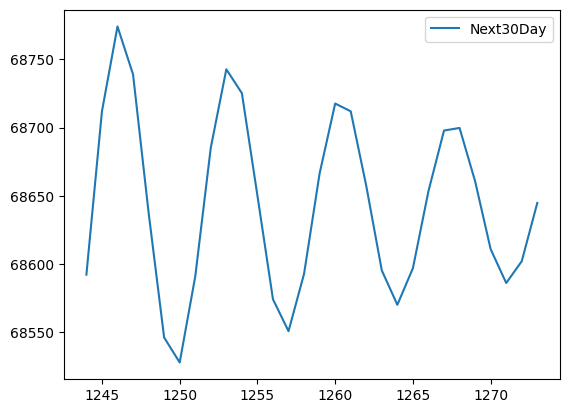

In [22]:
plt.plot(last_data,y_next_30_days)
plt.legend(['Next30Day'])
plt.show()